In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Template Matching
- Template Matching을 이용해 이미지에서 객체 찾기
- cv2.matchTemplate(), cv2.minMaxLoc() 사용

    Template Matching은 더 큰 이미지에서 Template image의 위치를 검색하고 찾는 방법이다. OpenCV에서는 cv2.matchTempalte() 함수를 사용해 Template Matching을 사용할 수 있다. 마치 2D convolution 처럼 입력 이미지 위에서 template image를 좌상단에서 우측으로 이동시켜가면서 template image 아래에 있는 입력 이미지의 관심 영역과 template을 비교한다. OpenCV에서는 이를 위한 몇 가지 비교 메소드들이 구현되어 있다. 비교 메소드는 Grayscale 이미지를 반환하며, 여기서 각 픽셀은 해당 픽셀의 인접 영역이 template와 얼마나 일치하는지를 나타낸다.
    
    만약 입력 이미지의 크기가 (W * H)이고 template image의 크기가 (w * h)라면, 출력 이미지는 (W-w+1, H-h+1)이다. 일단 결과를 얻고 나면, 우리는 cv2.minMaxLoc() 함수를 통해 최댓값과 최솟값, 위치를 찾을 수 있다. Template Matching을 하려면 우선 template image를 얻어야 하는데 이미지의 직사각형 좌상단에서 (w, h)의 크기를 가지는 직사각형을 취하면 그것이 template이 된다.

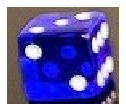

In [12]:
template = cv2.imread("image/cropped_dice.jpg")
plt.figure(figsize=(2, 2))
plt.imshow(template)
plt.axis("off")
plt.show()

    우선 위와 같이 입력이미지에서 내가 찾고자 하는 객체에 대한 이미지를 cropped해서 가져온다. 이후 cv2.matchTemplate 함수와 method들을 통해 각각의 픽셀들이 template image와 얼마나 매칭되는지를 확인한 후, minMaxLoc를 통해 최솟값과 최댓값, 그 위치 값을 가져온다. 이때, "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"의 경우에는 가장 어두운 곳(최솟값)이 매칭 지점이고, 나머지 알고리즘은 가장 밝은 부분(최댓값)이 매칭 지점이 된다.

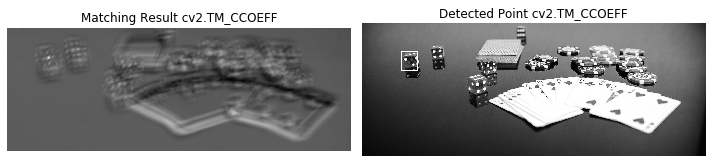

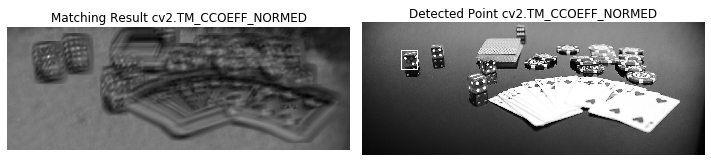

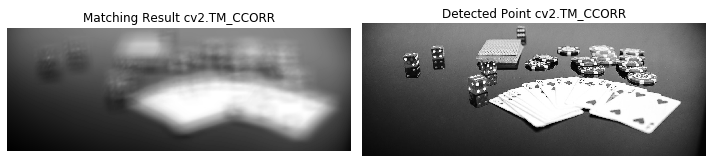

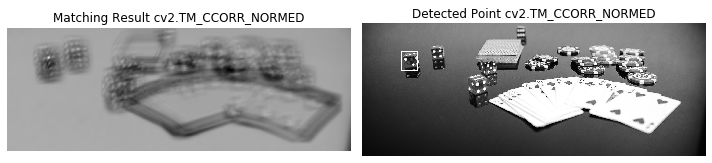

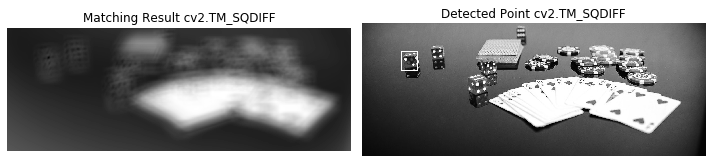

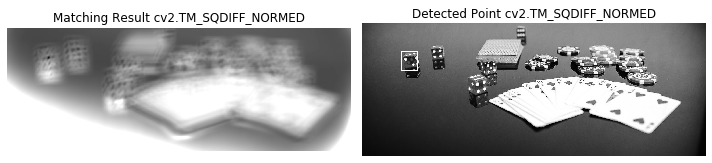

In [23]:
img = cv2.imread("image/poker-1564042_1280.jpg", cv2.IMREAD_GRAYSCALE)
img2 = img.copy()
template = cv2.imread("image/cropped_dice.jpg", cv2.IMREAD_GRAYSCALE)
w, h = template.shape[0], template.shape[1]

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # 최솟값
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    
    # 최댓값
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result ' + meth)
    plt.axis("off")
    
    plt.subplot(122)
    plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point ' + meth)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

## cv2.matchTemplate(image, templ, method [, result [, mask]]) -> result
    Template 이미지와 겹쳐진 부분을 비교하는 함수이다. Template 이미지를 입력 이미지 위에서 슬라이드 해가면서 특정 방법을 사용해 비교하고, 그 비교값을 결과에 저장한다. cv::TemplateMatchModes 에서는 가능한 방법들에 관한 공식들을 알려주고 있다. 이 함수로 template 이미지와 입력 이미지의 비교가 끝나고 나면, minMaxLoc 함수를 통해서 전역 최솟값(TM_SQDIFF를 사용했을 경우)과 전역 최댓값(TM_CCORR, TM_CCOEFF를 사용했을 경우)으로 어느 부분이 가장 일치하는지 찾을 수 있다.
    
    1. image : 검색을 수행할 이미지로 8-bit 혹은 32-bit의 이미지여야 한다.
    2. templ : 검색할 template 이미지로 입력 이미지보다 커서는 안되며 8-bit 혹은 32-bit의 이미지여야 한다.
    
    ★. method : templ와 image의 비교를 수행할 연산자를 선택한다.
    1. cv2.TM_SQDIFF
    2. cv2.TM_SQDIFF_NORMED
    3. cv2.TM_CCORR
    4. cv2.TM_CCORR_NORMED
    5. cv2.TM_CCOEFF
    6. cv2.TM_CCOEFF_NORMED
    (cv::TemplateMatchModes 참고)
    
    4. result : 비교 결과를 반환하여 저장한다. 32-bit의 단일 채널 이미지이며, image가 (W*H), templ이 (w*h)일 때 결과값은 (W-w+1, H-h+1) 이다.
    5. mask : 선택 옵션으로 templ과 같은 크기를 가지고 있어야만 한다. 또한 template과 image에서 모두 사용되는 단일 채널을 가지거나 template와 같은 수의 채널을 가지고 있어야 한다. 만약 데이터 타입이 CV_8U라고 하면, mask는 binary mask로 해석된다. 즉, 마스크가 0이 아닌 요소만 사용되고 실제 마스크 값(가중치 1)과 관계없이 변경되지 ㅇ낳고 유지된다. CV_32F인 경우, mask값이 가중치로 사용된다. cv::TemplateMatchModes에 관련된 공식이 정확하게 쓰여있다.

## cv2.minMaxLoc(src [, mask]) -> minVal, maxVal, minLoc, maxLoc
    단일 채널 배열을 입력하면 전역 최솟값과 최댓값, 그 값들의 위치를 찾아준다. 만약 mask가 입력되는 경우, mask로 지정된 배열 안에서의 최솟값과 최댓값을 찾는다. 이 함수는 다중 채널에서는 작동하지 않는다. 만약 모든 채널에 걸쳐 최솟값과 최댓값을 찾을 필요가 있다면 reshape 을 이용해 다중 채널을 단일 채널로 만들어야 한다. 혹은 extractImageCOI, mixChannels, split 등을 사용해서 특정 채널에 대한 결과값을 추출해낼 수도 있다.

## Template Matching with Multiple Objects
    앞서는 이미지에서 단 하나의 객체만 찾을 수 있었다. 만약 이미지에서 한 객체가 여러개 있고 이를 모두 찾아내고 싶다고 하면 cv2.minMaxLoc로는 모든 위치를 찾을 수 없다. 이 경우, 우리는 threshold를 이용할 수 있다.

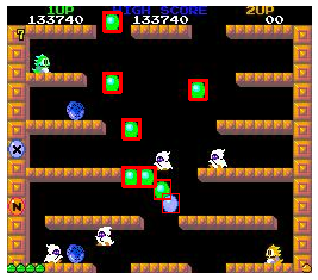

In [30]:
img_rgb = cv2.imread("image/14497276538643.jpg")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread("image/cropped_bubble.jpg", cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)
for pt in zip (*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), 255, 1)
    
plt.imshow(img_rgb, cmap = "gray")
plt.axis("off")
plt.tight_layout()
plt.show()

    보글보글 게임에서 물방울만 찾아 표시해보았다. 우선, matchTemplate 함수를 이용해서 template과 image의 matching 값을 찾는 것은 동일하나 그 이후, 최댓값과 최솟값을 찾는 것이 아닌, 좀 더 넓은 범위에서 특정 값 이상을 갖는 위치들을 찾으려고 한다. 
    
    cv2.TM_CCOEFF_NORMED는 최댓값에서 matching이 더 잘되므로 threshold 임계값을 0.8로 둔 뒤, matchTemplate 결과값 res에서 0.8 이상이 되는 값들의 위치를 찾는다. (이 임계값은 내가 임의로 설정할 수 있다. 임계값이 높을 수록 더 정확한 이미지를, 임계값이 낮을 수록 더 많은 객체를 탐색할 수 있다.) np.where 함수는 res에서 threshold 이상이 되는 값들의 위치를 찾아 2차원 배열로 반환한다. zip함수로 하나의 튜플로 만든 뒤, 객체를 찾은 곳의 위치를 bounding box로 감싸주면 된다.